**SOFT DEADLINE:** `20.03.2022 23:59 msk` 

# [5 points] Part 1. Data cleaning

The task is to clear the text data of the crawled web-pages from different sites. 

It is necessary to ensure that the distribution of the 100 most frequent words includes only meaningful words in english language (not particles, conjunctions, prepositions, numbers, tags, symbols).

Determine the order of operations below and carry out the appropriate cleaning.

1. Remove non-english words
1. Remove html-tags (try to do it with regular expression, or play with beautifulsoap library)
1. Apply lemmatization / stemming
1. Remove stop-words
1. Additional processing - At your own initiative, if this helps to obtain a better distribution

The choosen order:
1. Remove html-tags
2. Remove non-english words
3. Remove stop-words
4. Apply lemmatization / stemming
5. Additional processing

#### Hints

1. To do text processing you may use nltk and re libraries
1. and / or any other libraries on your choise

#### Data reading

The dataset for this part can be downloaded here: `https://drive.google.com/file/d/1wLwo83J-ikCCZY2RAoYx8NghaSaQ-lBA/view?usp=sharing`

In [43]:
import pandas as pd

# path = './storage/hw1/train.csv'
path = './storage/hw1/web_sites_data.csv'

In [44]:
# limit = None
limit = 1000

data = pd.read_csv(path, nrows=limit)

# for debug
# data = data.sample(100)

data.head()

,text
0,"<html>\n<head profile=""http://www.w3.org/2005/..."
1,"<html>\n<head profile=""http://www.w3.org/2005/..."
2,"<html>\n<head profile=""http://www.w3.org/2005/..."
3,"<html>\n<head profile=""http://www.w3.org/2005/..."
4,"<html>\n<head profile=""http://www.w3.org/2005/..."


In [45]:
ldata = data.values.tolist()
ldata = [i[0] for i in ldata]
ldata[0][:200], ldata[10][:300]

('<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.p',
 '<html>\n<head profile="http://www.w3.org/2005/10/profile">\n<LINK REL="SHORTCUT ICON" href="http://i.bookmooch.com/favicon.ico"> \n<link rel="icon" type="image/png" href="http://i.bookmooch.com/favicon.png">\n<title>Kevin J.Anderson : The X-Files (3) - Ground Zero</title>\n<meta http-equiv="Content-Type"')

#### Data processing

In [46]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
import re
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('omw-1.4') 
# nltk.download('punkt') 


In [47]:
# 1. Remove html-tags
def removeByRegex(ldata, lregexes, replaceValue=""):
    tldata = []

    for item in ldata:

        nitem = item
        for reg in lregexes:
            nitem = re.sub(reg, replaceValue, nitem)
            continue

        tldata.append(nitem)
        continue

    return tldata

# lregexes = [
#     """<("[^"]*"|'[^']*'|[^'">])*>""", "\t", """[\(\):"'=/><-\?&\\#;_,.]""", "  +", "\r", "\n", "nbsp;"
# ]

html_reg = """<("[^"]*"|'[^']*'|[^'">])*>"""
other_reg = ""

tldata = []
for item in ldata:

    nitem = item
    nitem = re.sub(html_reg, "", nitem)
    nitem = re.sub("\t", "", nitem)
    nitem = re.sub("\r", "", nitem)
    nitem = re.sub("\n", "", nitem)
    nitem = re.sub("""[\(\):"'=/><-\?&\\#;_,.]""", "", nitem)
    nitem = re.sub("nbsp;", "", nitem)
    nitem = re.sub("  +", "", nitem)
    nitem = re.sub("--", "", nitem)

    tldata.append(nitem)
    
    continue

ldata = tldata

In [48]:
## intermediate processing
def intermediateProccessing(ldata):

    tmp = ldata

    # to low each character
    tldata = []
    for item in tmp:
        tldata.append(item.lower())
        continue
    tmp = tldata

    # split string to words
    tldata = []
    for item in tmp:
        # tldata.append(item.split(' '))
        # tmp = []
        tldata.append([i for i in nltk.word_tokenize(item)])

        continue
    tmp = tldata

    # delete empty items
    tldata = []
    for words in tmp:
        tldata.append([word for word in words if word != ''])
        continue
    tmp = tldata

    return tmp

ldata = intermediateProccessing(ldata)
ldata[1][:15]

['eric',
 'newbyshort',
 'walk',
 'in',
 'the',
 'hindu',
 'kushnbsperic',
 'newbyshort',
 'walk',
 'in',
 'the',
 'hindu',
 'kushauthoreric',
 'newbytitleshort',
 'walk']

In [49]:
# 2. Remove non-english words (+ to lower type)
def removeNonEngWords(ldata):
    eng_words = set(nltk.corpus.words.words())

    tldata = []
    print(len(ldata[1]))
    for words in ldata:
        # tldata.append(" ".join(w for w in nltk.wordpunct_tokenize(item) if w.lower() in eng_words or not w.isalpha()))
        tldata.append([w.lower() for w in words if w.lower() in eng_words or not w.isalpha()])
        continue

    return tldata

# ldata = removeNonEngWords(ldata)

eng_words = set(nltk.corpus.words.words())

tldata = []
print(len(ldata[1]))
for words in ldata:
    # tldata.append(" ".join(w for w in nltk.wordpunct_tokenize(item) if w.lower() in eng_words or not w.isalpha()))
    tldata.append([w for w in words if w in eng_words or not w.isalpha()])
    
ldata = tldata

print(len(ldata[1]))
ldata[1][:10]

621
449


['eric', 'walk', 'in', 'the', 'walk', 'in', 'the', 'walk', 'in', 'the']

In [50]:
# ## its running more that 130 mins...
# # 3. Remove stop-words

# tldata = []
# for words in ldata:
#     print(len(words))
#     tmp = [word for word in words if word not in stopwords.words()]
#     tldata.append(tmp)
#     continue

# len(words)
# ldata = tldata
# ldata[1][:100]

In [51]:
# 4. Apply lemmatization / stemming
def applyLemma(ldata):
    lemmatizer = WordNetLemmatizer()

    tldata = []
    for words in ldata:
        tldata.append([ i for i in [lemmatizer.lemmatize(i) for i in words] if i != '' and i != ' ' ])
        continue

    return tldata

def applyStemm(ldata):
    stemmer = PorterStemmer()

    tldata = []
    for words in ldata:
        tldata.append([ i for i in [stemmer.stem(i) for i in words] if i != '' and i != ' ' ])
        continue

    return tldata

ldata = applyLemma(ldata)


# ldata = tldata
ldata[1][:10]

['eric', 'walk', 'in', 'the', 'walk', 'in', 'the', 'walk', 'in', 'the']

In [52]:
# 5. Additional processing


#### Vizualization

As a visualisation, it is necessary to construct a frequency distribution of words (the 100 most common words), sorted by frequency. 

For visualization purposes we advice you to use plotly, but you are free to choose other libraries

In [53]:
# wordfreq1 = [[word, words.count(word)] for word in ldata]
# wordfreq1[1][:10]

In [54]:
def get_wordfreq(list, limit=100):
    fwordfreq = []
    for word in list:

        fwordfreq.append([word, int(list.count(word))])

        if(len(fwordfreq) >= limit):
            break
        
        continue
    
    fwordfreq = pd.DataFrame(fwordfreq, columns=['word', 'freq'])
    fwordfreq.drop_duplicates(inplace=True)

    return fwordfreq

In [55]:
# init flatten list of words
fldata = []
for sublist in ldata:
    for item in sublist:
        # if item not in fldata:
        fldata.append(item)
        continue
    continue

fwordfreq = get_wordfreq(fldata)
# fwordfreq = fwordfreq[fwordfreq[:, 1].argsort()[::-1]]
fwordfreq.sort_values(by=['freq', 'word'], ascending=False, inplace=True)
# fwordfreq.head()

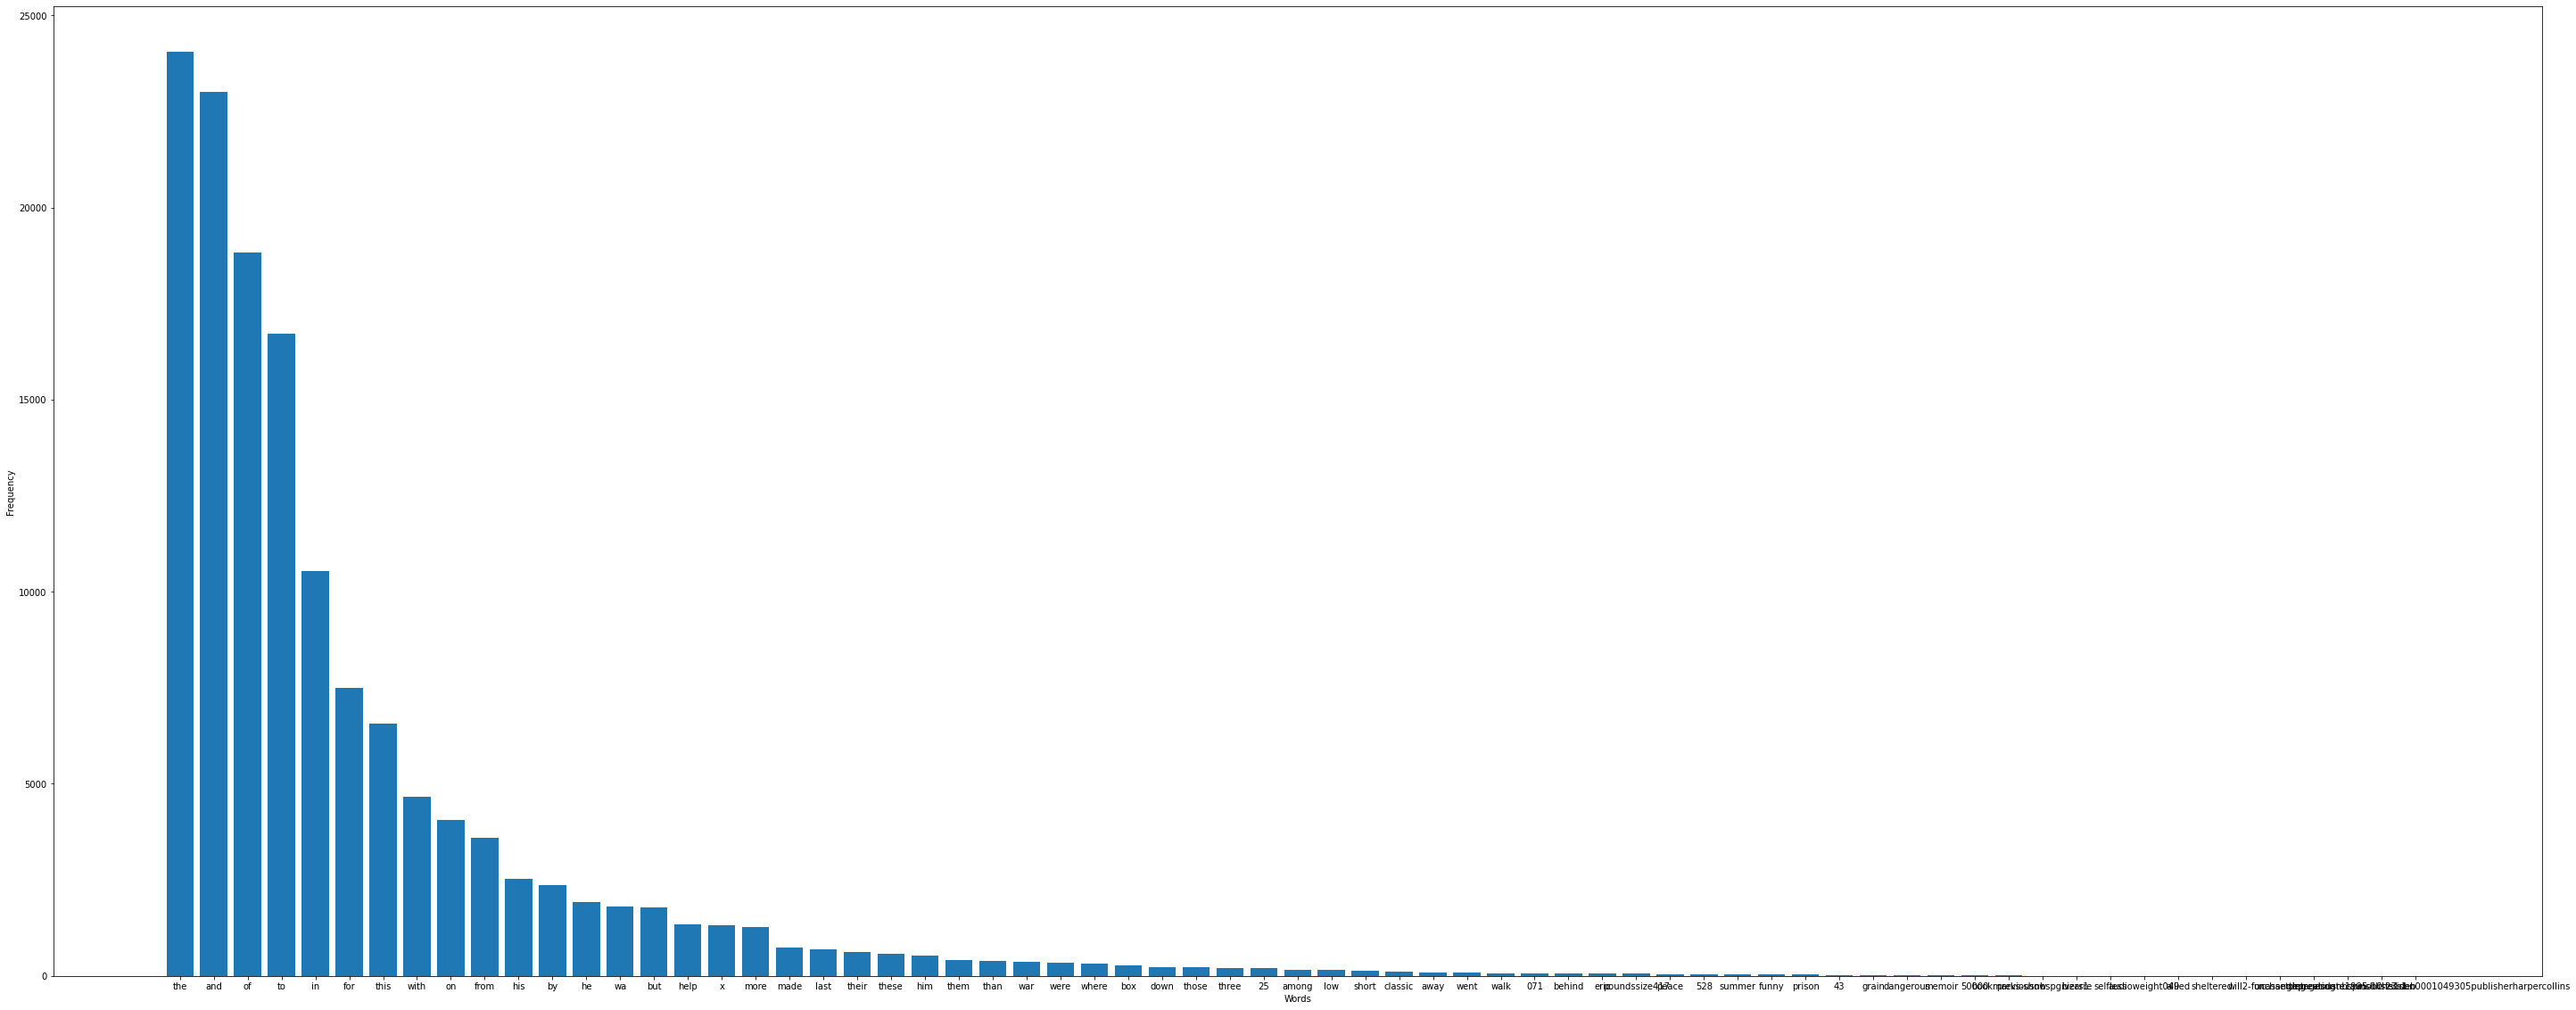

In [56]:
import matplotlib.pyplot as plt

def show_wordfreq(wordfreq, limit=100, bar_width=0.4):
    data = wordfreq[:limit]
    plt.figure(figsize=(50, 20))
    # plt.bar(data['word'], data['freq'], bar_width)
    plt.bar(data['word'], data['freq'])
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
    pass


show_wordfreq(fwordfreq)

#### Provide examples of processed text (some parts)

Is everything all right with the result of cleaning these examples? What kind of information was lost?

# [10 points] Part 2. Duplicates detection. LSH

#### Libraries you can use

1. LSH - https://github.com/ekzhu/datasketch
1. LSH - https://github.com/mattilyra/LSH
1. Any other library on your choise

1. Detect duplicated text (duplicates do not imply a complete word-to-word match, but texts that may contain a paraphrase, rearrangement of words, sentences)
1. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
1. Make a plot dependency of duplicates on minhash length (with fixed shingle size)

In [1]:
# raise Exception('nope')
import datasketch
from nltk import ngrams
from datasketch import MinHash, MinHashLSH
import matplotlib.pyplot as plt

In [2]:
# 1. Detect duplicated text
def duplicates_number_detection(perm=128, n_gr=2):
  lsh = MinHashLSH(threshold=0.4, num_perm=perm)

  # Create MinHash objects
  minhashes = {}
  for c, i in ldata:
    minhash = MinHash(num_perm=perm)
    #print(i)
    for d in ngrams(i, n_gr):
      #print(d)
      minhash.update("".join(d).encode('utf-8'))
    lsh.insert(c, minhash)
    minhashes[c] = minhash


  dupl_pairs = 0
  for i in range(len(minhashes.keys())):
    result = lsh.query(minhashes[i])
    dupl_pairs += len(result) -1
  return dupl_pairs/2

In [3]:
per_list = []
ngr_list = []
duplicates_list = []
for i in [40,60,80,100,128]:
    print(i)
    per_list.append(i)
    duplicates_list.append(duplicates_number_detection(i,3))

40


NameError: name 'data' is not defined

In [ ]:
duplicates_df = pd.DataFrame()
duplicates_df['permutations'] = per_list
duplicates_df['duplicates'] = list(map(int, duplicates_list))

In [59]:
# 2. Make a plot dependency of duplicates on shingle size (with fixed minhash length) 
plt.bar([str(x) for x in duplicates_df['permutations']],duplicates_df['duplicates'])
plt.xlabel('permutations')
plt.ylabel('duplicates pairs')
plt.title('Number of duplicated pairs with fixed number of ngrams = 3',pad=20)
plt.show()

In [60]:
# 3. Make a plot dependency of duplicates on minhash length
ngr_list = []
duplicates_list = []
for i in [1,2,3,4,5]:
    print(i)
    ngr_list.append(i)
    duplicates_list.append(duplicates_number_detection(128,i))

plt.bar([str(x) for x in ngr_list],duplicates_list)
plt.xlabel('ngrams')
plt.ylabel('duplicates pairs')
plt.title('Number of duplicated pairs with fixed number of permutations = 128',pad=20)
plt.show()

# [Optional 10 points] Part 3. Topic model

In this part you will learn how to do topic modeling with common tools and assess the resulting quality of the models. 

In [61]:
import pandas as pd

path3 = './storage/hw1/data.csv'

In [62]:
limit = 1000

data3 = pd.read_csv(path3, nrows=limit, index_col='id')

# for debug
# data3 = data3.sample(1000)

data3.head()

,text,author
id,,
id26305,"This process, however, afforded me no means of...",EAP
id17569,It never once occurred to me that the fumbling...,HPL
id11008,"In his left hand was a gold snuff box, from wh...",EAP
id27763,How lovely is spring As we looked from Windsor...,MWS
id12958,"Finding nothing else, not even gold, the Super...",HPL


The provided data contain chunked stories by Edgar Allan Poe (EAP), Mary Shelley (MWS), and HP Lovecraft (HPL).

The dataset can be downloaded here: `https://drive.google.com/file/d/14tAjAzHr6UmFVFV7ABTyNHBh-dWHAaLH/view?usp=sharing`

#### Preprocess dataset with the functions from the Part 1

In [63]:
ldata3 = data3['text'].values.tolist()
ldata3[0][:200], ldata3[10][:200]

('This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so per',
 'He shall find that I can feel my injuries; he shall learn to dread my revenge" A few days after he arrived.')

In [64]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer
import re
# nltk.download('words')
# nltk.download('stopwords')
# nltk.download("wordnet")
# nltk.download('omw-1.4')

In [65]:
# 1. Remove html-tags
lregexes = [
    "\t", """[\(\):"'=/><-\?&\\#;_,.]""", "  +", "\r", "\n", "nbsp;"
]
ldata3 = removeByRegex(ldata3, lregexes)
ldata3[1][:300]

'It never once occurred to me that the fumbling might be a mere mistake'

In [66]:
## intermediate processing
ldata3 = intermediateProccessing(ldata3)
ldata3[1][:30]

['it',
 'never',
 'once',
 'occurred',
 'to',
 'me',
 'that',
 'the',
 'fumbling',
 'might',
 'be',
 'a',
 'mere',
 'mistake']

In [67]:
# 2. Remove non-english words
ldata3 = removeNonEngWords(ldata3)
len(ldata3[1])

14


13

In [68]:
# # 3. Remove stop-words
# tldata = []

# print(len(ldata[1]))

# for words in ldata:
#     tmp = [word for word in words if word not in stopwords.words()]
#     tldata.append(tmp)
#     continue

# ldata = tldata
# print(len(ldata[1]))

In [69]:
# 4. Apply lemmatization / stemming
ldata3 = applyLemma(ldata3)
ldata3[1][:10]

['it', 'never', 'once', 'to', 'me', 'that', 'the', 'fumbling', 'might', 'be']

#### Quality estimation

Implement the following three quality fuctions: `coherence` (or `tf-idf coherence`), `normalized PMI`, `based on the distributed word representation`(you can use pretrained w2v vectors or some other model). You are free to use any libraries (for instance gensim) and components.

In [70]:
import math
import numpy as np

import gensim
import gensim.corpora as corpora
from gensim import topic_coherence
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from sklearn.metrics import normalized_mutual_info_score


In [71]:
# def coherence(x, y, fs=1.0):
#     Pxy, Pxx, Pyy = 0, 0, 0
#     Cxy = abs(Pxy)**2/(Pxx*Pyy)
#     return Cxy

def coherence(input_data, topics=ldata3):
    id2word = corpora.Dictionary(input_data)
    corpus = [id2word.doc2bow(text) for text in input_data]
    # cm = CoherenceModel(topics=topics, corpus=common_corpus, dictionary=common_dictionary, coherence='u_mass')
    cm = CoherenceModel(topics=topics, corpus=corpus,
                        dictionary=id2word, coherence='u_mass')
    coherence = cm.get_coherence()  # get coherence value
    return coherence

coherence(ldata3)

-2.1017591012313366

In [72]:
# https://towardsdatascience.com/word2vec-for-phrases-learning-embeddings-for-more-than-one-word-727b6cf723cf
def npmi(x, y, input_data=ldata3):
    def por(x, y): return sum([1 for words in input_data if x in words or y in words])
    def p(x): return sum([1 for words in input_data if x in words])
    npmi = ( np.log2( por(x, y) / ( p(x) * p(y) ) ) / -np.log(por(x, y)) )
    return npmi

npmi('walk', 'short')

# def pmi(word1, word2, unigram_freq, bigram_freq):
#     prob_word1 = unigram_freq[word1] / float(sum(unigram_freq.values()))
#     prob_word2 = unigram_freq[word2] / float(sum(unigram_freq.values()))
#     prob_word1_word2 = bigram_freq[" ".join(
#         [word1, word2])] / float(sum(bigram_freq.values()))
#     return math.log(prob_word1_word2/float(prob_word1*prob_word2), 2)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html
# def npmi():
#     res = normalized_mutual_info_score([0, 0, 1, 1], [0, 0, 1, 1])
#     return res


-0.1468022970444337

In [73]:
# https://towardsdatascience.com/word-representation-in-natural-language-processing-part-i-e4cd54fed3d4

# https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/

# https://towardsdatascience.com/word-embeddings-exploration-explanation-and-exploitation-with-code-in-python-5dac99d5d795


def representationDistr():
    return

### Topic modeling

Read and preprocess the dataset, divide it into train and test parts `sklearn.model_selection.train_test_split`. Test part will be used in classification part. For simplicity we do not perform cross-validation here, but you should remember about it.

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X = data3['text']
y = data3['author']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Plot the histogram of resulting tokens counts in the processed datasets.

In [77]:
import nltk
from nltk.tokenize import TreebankWordTokenizer, WhitespaceTokenizer

In [78]:
def getTokensAndCounts(data):
    tokens = []
    for item in data:
        tokens.append([i for i in nltk.word_tokenize(item)])
        continue
    counts = []
    for i in tokens:
        counts.append(len(i))
        continue
    print(tokens[0][:10], counts[0])
    return tokens, counts

train_tokens, train_counts = getTokensAndCounts(X_train)
test_tokens, test_counts = getTokensAndCounts(X_test)

['What', 'he', 'said', 'was', 'unintelligible', ',', 'but', 'words', 'were', 'uttered'] 16
['Valdemar', ',', 'do', 'you', 'still', 'sleep', '?', "''"] 8


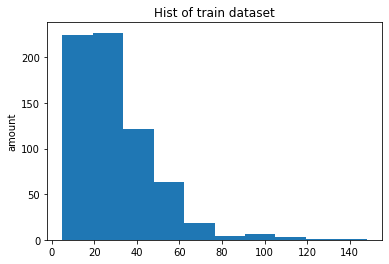

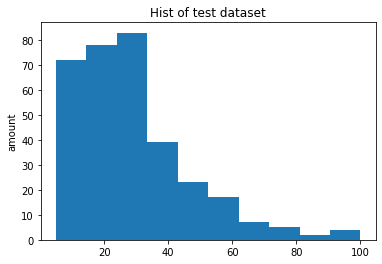

In [79]:
def showTokensCounts(tokens, counts, title='Histogram of counts'):
    plt.hist(counts)

    plt.ylabel('amount')
    # plt.xlabel('')

    plt.title(title)
    plt.show()
    pass

showTokensCounts(train_tokens, train_counts, title='Hist of train dataset')
showTokensCounts(test_tokens, test_counts, title='Hist of test dataset')

#### NMF

Implement topic modeling with NMF (you can use `sklearn.decomposition.NMF`) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [80]:
from sklearn.decomposition import NMF

In [81]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])

model = NMF(n_components=2, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

#### LDA

Implement topic modeling with LDA (you can use gensim implementation) and print out resulting topics. Try to change hyperparameters to better fit the dataset.

In [82]:
# https://radimrehurek.com/gensim/models/ldamodel.html
from gensim.models import ldamulticore
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.test.utils import datapath

In [83]:
# Create a corpus from a list of texts
id2word = corpora.Dictionary(ldata3)
corpus = [id2word.doc2bow(text) for text in ldata3]

# Train the model on the corpus.
lda = LdaModel(corpus, num_topics=10)

### Additive regularization of topic models 

Implement topic modeling with ARTM. You may use bigartm library (simple installation for linux: pip install bigartm) or TopicNet framework (`https://github.com/machine-intelligence-laboratory/TopicNet`)

Create artm topic model fit it to the data. Try to change hyperparameters (number of specific and background topics) to better fit the dataset. Play with smoothing and sparsing coefficients (use grid), try to add decorrelator. Print out resulting topics.

In [ ]:
from topicnet.cooking_machine.model_constructor import init_simple_default_model

artm_model = init_simple_default_model(
    dataset=data3,
    modalities_to_use={'@lemmatized': 1.0, '@bigram': 0.5},
    main_modality='@lemmatized',
    specific_topics=14,
    background_topics=1,
)


Write a function to convert new documents to topics probabilities vectors.

Calculate the quality scores for each model. Make a barplot to compare the quality.